# Función discreta de fourier.
Punto 1.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def dft(y):
    N = len(y)
    F = np.zeros(N, dtype=complex)
    for k in range(N):
        F[k] = np.sum(y * np.exp(-2j * np.pi * k * np.arange(N) / N))
    return F

Punto 2.

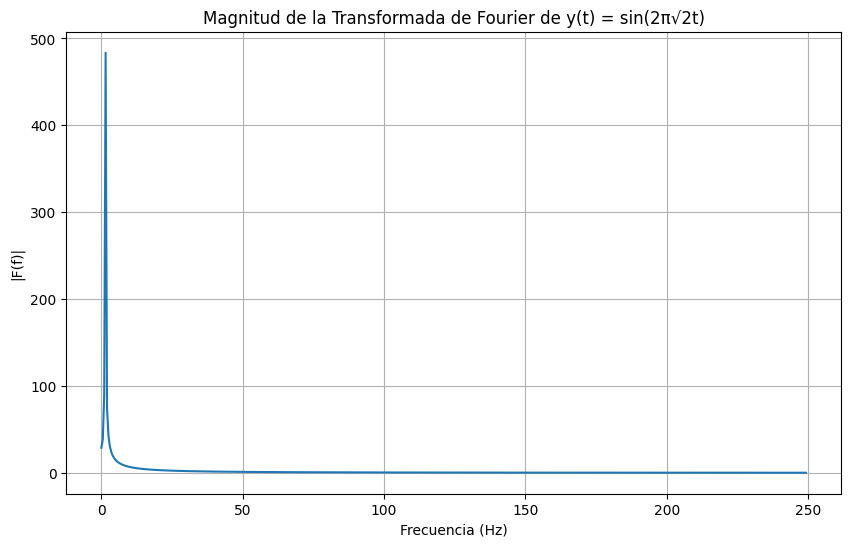

In [2]:
# Calculando la DFT de la señal original

# Parámetros
t_max = 2.0  # Tiempo máximo
N = 1000  # Número de muestras
t = np.linspace(0, t_max, N)  # Vector de tiempo
y = np.sin(2 * np.pi * np.sqrt(2) * t)  # Señal y(t
F = dft(y)
frequencies = np.fft.fftfreq(N, d=t[1]-t[0])

# Graficar la magnitud de la DFT
plt.figure(figsize=(10, 6))
plt.plot(frequencies[:N//2], np.abs(F[:N//2]))  # Graficar solo frecuencias positivas
plt.title("Magnitud de la Transformada de Fourier de y(t) = sin(2π√2t)")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("|F(f)|")
plt.grid(True)
plt.show()


¿Qué sucede si le agrega ruido a la señal en 𝑦?

Nótese que se añade ruido en las gráficas que siguen a esta, lo que genera picos pequeños y valles en la señal. Por lo que, es importante lograr diferenciar esta señal de ruido de los elementos que componen la señal.

Punto 3.

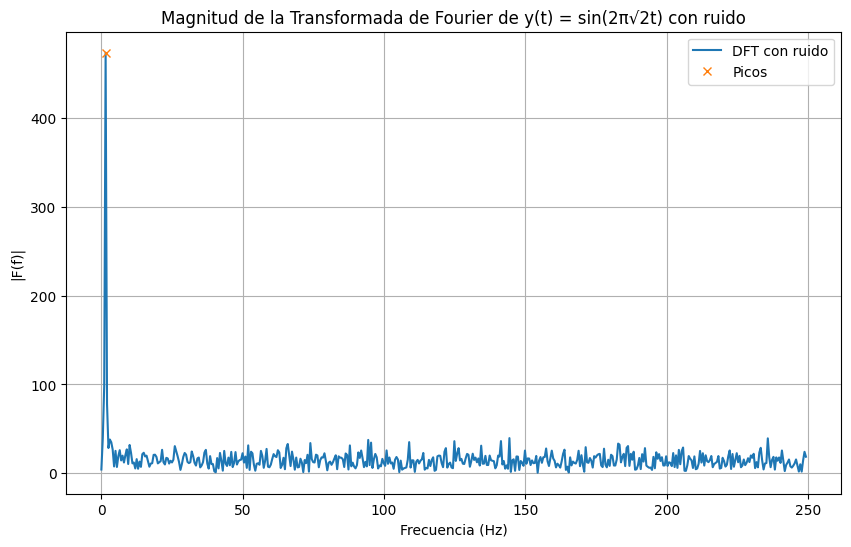

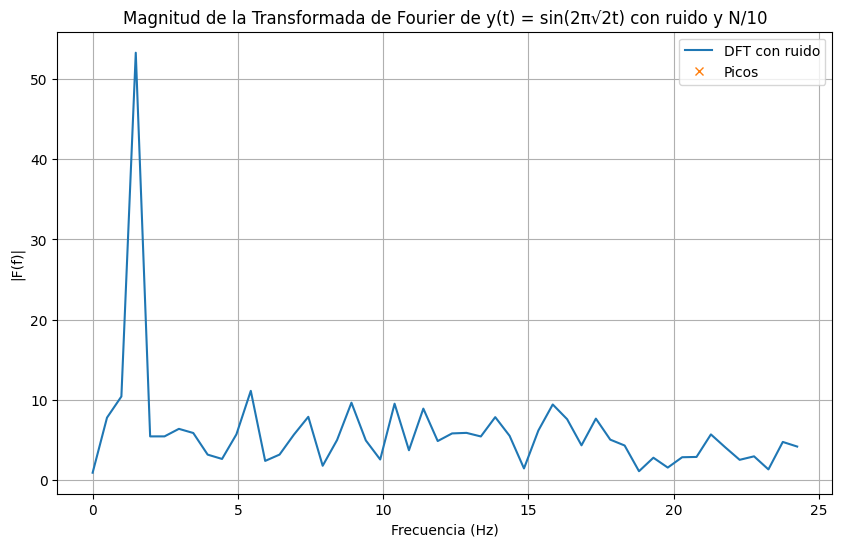

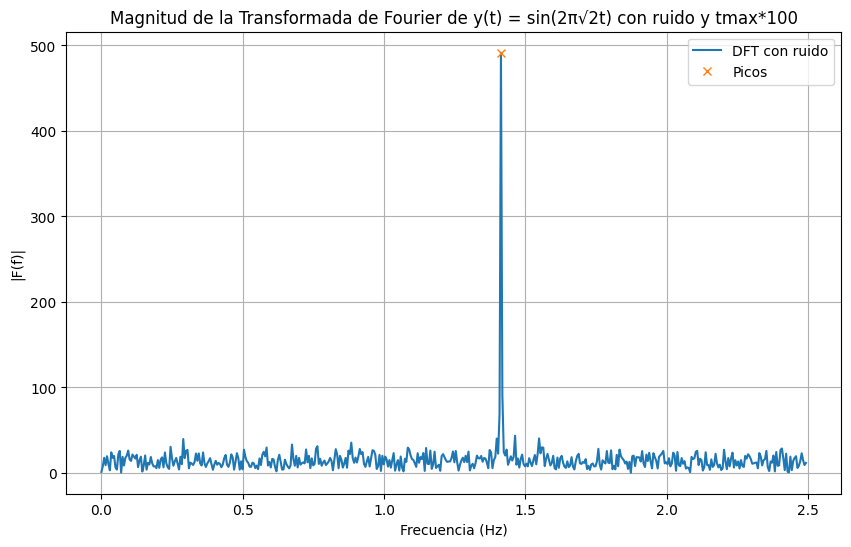

In [3]:


from scipy.signal import find_peaks


def plot_dft_with_peaks(y_noisy, N, title, frequencies, sensibilidad):
    F_noisy = dft(y_noisy)
    F_noisy_abs = np.abs(F_noisy[:N//2])

    peaks, _ = find_peaks(F_noisy_abs, prominence=sensibilidad)

    plt.figure(figsize=(10, 6))
    plt.plot(frequencies[:N//2], F_noisy_abs, label="DFT con ruido")  # Graficar solo frecuencias positivas
    plt.plot(frequencies[peaks], F_noisy_abs[peaks], "x", label="Picos")
    plt.title(title)
    plt.xlabel("Frecuencia (Hz)")
    plt.ylabel("|F(f)|")
    plt.grid(True)
    plt.legend()
    plt.show()

# Evaluación con N = 1000
t_max = 2.0
N = 1000
t = np.linspace(0, t_max, N)
y = np.sin(2 * np.pi * np.sqrt(2) * t)
frequencies = np.fft.fftfreq(N, d=t[1]-t[0])

noise = np.random.normal(0, 0.5, N)
y_noisy = y + noise
plot_dft_with_peaks(y_noisy, N, "Magnitud de la Transformada de Fourier de y(t) = sin(2π√2t) con ruido", frequencies,100)

# Evaluación con N = 100
N = 100
t = np.linspace(0, t_max, N)
y = np.sin(2 * np.pi * np.sqrt(2) * t)
frequencies = np.fft.fftfreq(N, d=t[1]-t[0])

noise = np.random.normal(0, 0.5, N)
y_noisy = y + noise
plot_dft_with_peaks(y_noisy, N, "Magnitud de la Transformada de Fourier de y(t) = sin(2π√2t) con ruido y N/10", frequencies,100)

# Evaluación con N = 1000 y t_max = 200
t_max = 200
N = 1000
t = np.linspace(0, t_max, N)
y = np.sin(2 * np.pi * np.sqrt(2) * t)
frequencies = np.fft.fftfreq(N, d=t[1]-t[0])

noise = np.random.normal(0, 0.5, N)
y_noisy = y + noise
plot_dft_with_peaks(y_noisy, N, "Magnitud de la Transformada de Fourier de y(t) = sin(2π√2t) con ruido y tmax*100", frequencies,100)



Cambie sólo el número de muestras 𝑁 . ¿Cambia la posición del pico o su ancho? ¿Por qué?


La posición del pico no cambia, sin embargo el diferenciador con la sensibilidad elegida no logra detectarlo, no debe cambiar pues este solo depende de los componentes de la señal. Lo que si varía es el FWHM, que depende del número de muestras. A menos muestras  el pico es más ancho.


Cambie sólo el rango de tiempo 𝑡max ¿Cambia la posición del

El pico puede cambiar su posición pues se varía el muestreo lo que puede mover la posición del pico a una frecuencia más baja. Puede generar una mejor discriminación a frecuencias altas.

Punto 4.


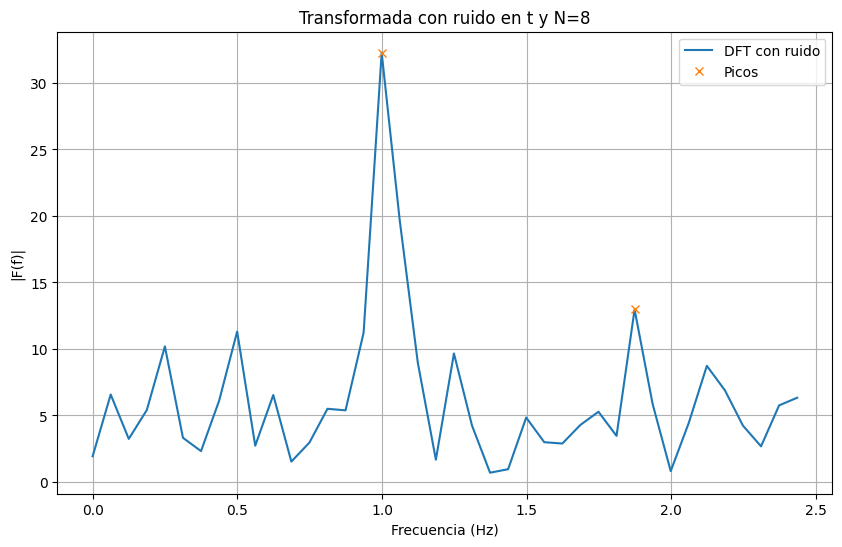

In [4]:
N = 80
ts_0 = np.linspace(0,10,N)
ts = ts_0 + np.random.normal(0.,0.01,N)
f = 2*np.pi
ys = np.sin(2*np.pi*ts*f)
F = dft(ys)
frequencies = np.fft.fftfreq(N, d=t[1]-t[0])
noise = np.random.normal(0, 0.5, N)
y_noisy = ys + noise
Sensib=10
plot_dft_with_peaks(y_noisy,N,"Transformada con ruido en t y N=8", frequencies, Sensib)


En general el agregar ruido puede evitar que la señal presente un problema de aliasing muy grave. Sin embargo, sin N es muy pequeño es imposible recuperar la función original. Por otro lado el asignar ruido al tiempo no evita que a un N apropiado se pueda lograr recuperar la señal. Finalmente, todo depende de la relación muestreo y ruido.

Punto 5.

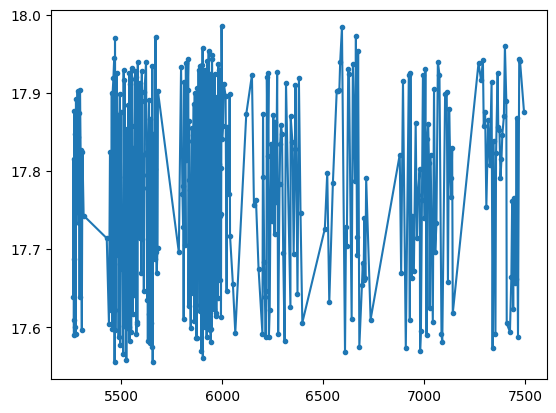

In [6]:
import requests
url = "https://www.astrouw.edu.pl/ogle/ogle4/OCVS/lmc/cep/phot/I/OGLE-LMC-CEP-0001.dat"
response = requests.get(url)
data = []
for line in response.text.splitlines():   #la lectura me ayudó a hacerla CHAT
  columns = line.split()
  data.append([float(value) for value in columns])
data_array = np.array(data)
plt.plot(data_array[:, 0], data_array[:, 1], 'o-', markersize=3)
y= data_array[:, 1]
t=data_array[:, 0]

# No se logró generar un espectro realista :(
